# Logistic Regression

This is my attempt to implement Logistic Regression using Python3 and Numpy. I was inspired to do this work after having taken [Andrew Ng's Machine Learning course on Coursera](https://www.coursera.org/learn/machine-learning). Most of the equations used herein come from his course notes. Also most of the work here is implemented in vectorized form.

Logistic regression can be useful for classification problems - estimating probability for an outcome and setting a logistic threshold to determine if the outcome happens (or not).

### Hypothesis
The *hypothesis* $\hat{y}$ for the logistic regression is:

$\hat{y} = g(\theta^{T}x)$

with the *sigmoid* function $g(z)$:

$g(z) = \dfrac{1}{1 + {\rm e}^{-z}}$

### Cost function
The logistic regression cost function $J(\theta)$ for dataset with $m$ samples and $n$ features can be evaluated as:

$J(\theta) = \dfrac{1}{m} \sum\limits_{i=1}^{m} \left[-y_i log(\hat{y_i}) - (1 - y_i) log (1 - \hat{y_i})\right]$


### Gradient of the cost function
$\frac{\partial J(\theta)}{\partial \theta_j} = \dfrac{1}{m} \sum\limits_{i=1}^{m} \left(\hat{y_i} - y_i\right)x_j^i$

**Note**, the superscript $i$ on the $x_j$ term at the end is an index label (not exponent). I do this for brevity - to avoid having to use prenthesis around the $i$ index labels as Andrew Ng does in his notes (the standard way). Also a reminder that the $j$ and $i$ are index elements of $m$ and $n$, respectively.

### Gradient Descent
At every step of the *gradient descent*, the parameters $\theta$ is updated as:

$\theta_j = \theta_j - \alpha \dfrac{1}{m} \sum\limits_{i=1}^{m} \left(\hat{y_i} - y_i\right)x_j^i$

to achieve the lowest cost $J(\theta)$. *Note* $\alpha$ here is the *learning rate* and, the second term is simply the *gradient of the cost function* multiplied by the learning rate. This is where the method gets its name.

## Model Implementation

In [1]:
# import modules
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# matplotlib plot settings
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.rc('lines', linewidth=2.5)

In [2]:
# Utility Functions
def featureNormalize(X):
    '''
    Feature scaling such that each feature in the normalized X
    has mean of 0 and standard deviation of 1.'''
    X_mean = np.mean(X) # mean
    X_std = np.std(X) # standard deviation
    X_norm = (X - X_mean) / X_std # feature scaling
    return X_norm, X_mean, X_std

def plotDecisionBoundary(X, y, theta=False): # visualize data
    '''
    optimized theta passed is assumed to be numpy ndarray'''
    plt.figure()
    plt.plot(X[y==1, 0], X[y==1, 1], 'b*', label="virginica (1)")
    plt.plot(X[y==0, 0], X[y==0, 1], 'ro', label="not-virginica (0)")
    if isinstance(theta, np.ndarray): # plot decision boundary
        min_max = np.array([X[:,0].min()-1, X[:,0].max()+1]) # endpoints
        boundary = -theta.item(0) / theta.item(2) + min_max * (
            - theta.item(1) / theta.item(2))
        plt.plot(min_max, boundary, 'k--')
    plt.xlabel("petal length")
    plt.ylabel("petal width")
    plt.legend();

def plotCostHistory(costs):
    plt.plot(costs, 'r-')
    plt.xlabel("iterations")
    plt.ylabel("cost")

In [3]:
class myLogisticRegression():
    '''
    My implementation of Logistic Model Gradient Descent'''
    def __init__(self, lr=0.1, reg=0):
        self.lr = lr # learning rate
        self.reg = reg # regularization parameter

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
             
    def _costFunc(self, y, h): # cost function
        return -1/len(y) * (np.log(h).T @ y
                            + np.log(1 - h).T @ (1-y))
        
    def _gradient(self, X, y, h): # gradient of cost function
        return 1/len(y) * (X.T @ (h - y))
     
    def gradient_descent(self, X, y, iters=500):
        '''
        Gradient Descent to train linear regression model.
        It is assumed that X already includes the bias term.'''
        y = y.reshape(-1,1) # convert to column vector
        
        # initialize
        # the "self" designation allows model.costs or model.theta access after fit
        self.theta = np.zeros(shape=(X.shape[1], 1))
        self.costs = []
        
        for iter in range(iters):
            z = X @ self.theta
            h = self._sigmoid(z)
            cost = self._costFunc(y, h)
            self.costs.append(cost.item()) # appended cost from np.ndarray(1,1) to number
            gradients = self._gradient(X, y, h)
            self.theta = self.theta - self.lr * gradients
        
   
    def predict_prob(self, X):
        '''
        predicted probabilities'''
        return self._sigmoid(X @ self.theta)
    
    def predict(self, X, threshold=0.5):
        '''binary predictions'''
        return (self.predict_prob(X) >= threshold).astype(np.int)   

### Training

In [4]:
# For this exercise, I use is the Iris data set from the
# scikit-learn datasets

from sklearn import datasets

iris = datasets.load_iris()
print(f"dataset keys: {[k for k in iris.keys()]}\n")

print(f"targets: {np.unique(iris.target)} for {iris.target_names}\n")

print(f"features: {iris.feature_names}")

dataset keys: ['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename']

targets: [0 1 2] for ['setosa' 'versicolor' 'virginica']

features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Xb shape: (150, 3)
y shape: (150,)


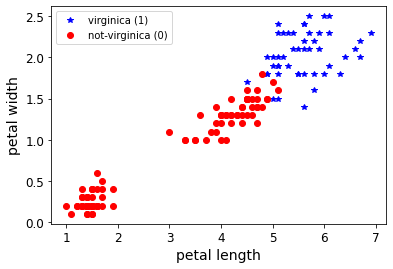

In [5]:
X = iris.data[:, 2:] # selected features, petal-length, -width
y = iris.target
# convert y to binary
y = (y == 2).astype(np.int) # 1 if virginica, 0 if not

# visualize data
plotDecisionBoundary(X, y, theta=False)

Xb = np.c_[np.ones((X.shape[0], 1)), X] # add bias (X0) with ones
print(f"Xb shape: {Xb.shape}\ny shape: {y.shape}")

CPU times: user 4.25 ms, sys: 1.02 ms, total: 5.28 ms
Wall time: 4.78 ms


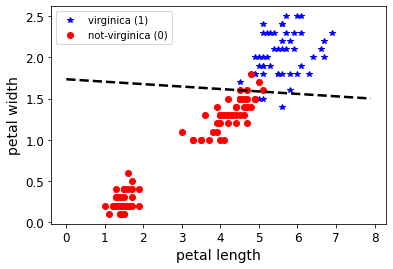

In [6]:
model = myLogisticRegression(lr=0.3, reg=0)
%time model.gradient_descent(Xb, y, iters=100)

# access optimized parameters
costs, theta = model.costs, model.theta

# plot post optimization decision boundary
plotDecisionBoundary(X, y, theta=theta)

#plotCostHistory(costs)

From visual inspection, most instances seem to have been classified correctly (I'll confirm that with accuracy below). Decision boundary hints the petal width might be a stronger classification feature for (binary) virginica identification.

In [7]:
y_preds = model.predict(Xb, threshold=0.5).reshape(-1,)
accuracy = np.mean(y_preds == y)
print(f"model accuracy: {accuracy:.3f}")

model accuracy: 0.953


### Compare against Logistic Regression from scikit-learn

In [8]:
from sklearn.linear_model import LogisticRegression

sklearn_lg = LogisticRegression(solver="lbfgs", C=10**10, max_iter=100, random_state=42)
%time sklearn_lg.fit(Xb, y)
print(f"\nsklearn model accuracy: {sklearn_lg.score(Xb, y):.3f}")

CPU times: user 7.92 ms, sys: 351 µs, total: 8.27 ms
Wall time: 8.54 ms

sklearn model accuracy: 0.960


Although my toy logistic regressor performed resonably compared to the sklearn model in this exercise, sklearn is clearly the recommended, preferred, and robost model with many options and flexibilities.

Wouldn't it be nice to apply multinomial logistic classifier to predict labels for all flowers? We'll try this with Softmax Regression in the next module.